In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf # Regresion con stasts models

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100) 

# Carga de los datos


In [3]:
# Cargar el CSV file al dataframe
data = pd.read_csv("./gapminder.csv")

In [4]:
# Tamaño del DF
data.shape

(178, 16)

In [5]:
# Tipos de datos
data.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

In [11]:
# Datos de ejemplo del Dataframe
data.sample(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
33,South Africa,3745.649852,10.16,0.331863,35.0,1.460985e+10,34.299999,17.8,12.334893,52.797,0.504659,9.0,920.137600,15.714571,41.099998,60.74
9,Thailand,2712.517199,7.08,1.093651,16.6,4.200940e+09,65.000000,1.3,21.200072,74.126,0.726250,4.0,439.589732,9.847460,72.000000,33.32
104,Cameroon,713.639303,7.90,0.305758,29.7,1.251727e+08,49.000000,5.3,3.999977,51.610,NaN,-4.0,59.551245,7.214221,59.099998,56.76
151,Turkmenistan,2062.125152,5.00,0.931418,17.9,5.313037e+08,53.900002,NaN,2.199998,64.986,1.110671,-9.0,351.166594,12.216769,58.500000,48.62
22,Azerbaijan,2344.896916,13.34,1.976746,31.5,5.111077e+08,56.200001,0.1,46.679702,70.739,0.359173,-7.0,921.562111,1.380965,60.900002,51.92
98,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
63,Guyana,1200.652075,8.70,0.877666,29.5,6.932933e+07,41.799999,1.2,29.879921,69.927,NaN,6.0,NaN,35.752872,58.900002,28.38
25,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96


## Información de los datos

---
> **incomeperperson**: Producto Interno Bruto (PIB) per cápita
---

* **Alcconsumption**: El consumo de alcohol puede tener implicaciones económicas, aunque no necesariamente es un indicador directo de desarrollo económico.

* **armedforcesrate**: Un alto porcentaje de la fuerza laboral en las fuerzas armadas podría indicar gastos militares significativos o una situación de inestabilidad que podría afectar al PIB.

* **co2emissions**: Las emisiones de CO2 podrían indicar un alto nivel de industrialización y producción.

* **femaleemployrate**: Una alta tasa de empleo femenino podría indicar una economía más inclusiva y diversificada.

* **HIVrate**: Una alta prevalencia del VIH podría tener impactos económicos a través de los costos de salud y la pérdida de fuerza laboral.

* **Internetuserate**: El acceso a internet es una señal de infraestructura y digitalización, lo que puede estar correlacionado con un PIB más alto. (representa el número de usuarios de internet por cada 100 personas).

* **lifeexpectancy**: Una expectativa de vida más alta generalmente indica mejores condiciones de salud y calidad de vida, lo que podría correlacionarse con un PIB más alto.

* **oilperperson**: El consumo de petróleo puede estar relacionado con la industrialización y la movilidad en un país.

* **polityscore**: Una puntuación democrática más alta podría indicar estabilidad política, que es favorable para la economía.
* **relectricperperson**: El consumo de electricidad residencial puede estar relacionado con el desarrollo y la calidad de vida.

* **employrate**: Una alta tasa de empleo generalmente es indicativa de una economía saludable.
* **urbanrate**: Una alta tasa de urbanización podría estar relacionada con el desarrollo económico y la industrialización.

In [13]:
# Valida valores nulos en las columnas
for name_column in data.columns.values:
    print(f"El numero de valores nulos {pd.isnull(data[name_column]).values.ravel().sum()} de la culmna {name_column} ")

El numero de valores nulos 0 de la culmna country 
El numero de valores nulos 3 de la culmna incomeperperson 
El numero de valores nulos 0 de la culmna alcconsumption 
El numero de valores nulos 4 de la culmna armedforcesrate 
El numero de valores nulos 1 de la culmna breastcancerper100th 
El numero de valores nulos 2 de la culmna co2emissions 
El numero de valores nulos 1 de la culmna femaleemployrate 
El numero de valores nulos 23 de la culmna hivrate 
El numero de valores nulos 4 de la culmna internetuserate 
El numero de valores nulos 0 de la culmna lifeexpectancy 
El numero de valores nulos 111 de la culmna oilperperson 
El numero de valores nulos 11 de la culmna polityscore 
El numero de valores nulos 37 de la culmna relectricperperson 
El numero de valores nulos 0 de la culmna suicideper100th 
El numero de valores nulos 1 de la culmna employrate 
El numero de valores nulos 0 de la culmna urbanrate 


In [14]:
# Elimina filas donde al menos una columna tiene valor null
data_cleaned = data.dropna(subset=["armedforcesrate", "internetuserate", "lifeexpectancy", "incomeperperson", "armedforcesrate", "employrate" ])

In [16]:
data_cleaned.shape

(167, 16)

In [17]:
# Valores unicos en la variable
data_cleaned["country"].unique()

array(['Ireland', 'Albania', 'Central African Rep.', 'Barbados', 'Italy',
       'Switzerland', 'Mauritania', 'Oman', 'Tanzania', 'Thailand',
       'Haiti', 'Equatorial Guinea', 'Guatemala', 'Iraq', 'Mali',
       'Bolivia', 'Kenya', 'Panama', 'Macedonia, FYR', 'Austria', 'Fiji',
       'Cuba', 'Azerbaijan', 'Korea, Rep.', 'Nicaragua', 'Lithuania',
       'Saudi Arabia', 'Belarus', 'Lesotho', 'Cape Verde', 'Eritrea',
       'Uganda', 'South Africa', 'Gabon', 'Georgia', 'Estonia',
       'Argentina', 'Cambodia', 'Suriname', 'Gambia', 'Japan',
       'Mozambique', 'Norway', 'Angola', 'Yemen, Rep.', 'Armenia',
       'Costa Rica', 'Turkey', 'Moldova', 'Pakistan', 'Vietnam', 'Spain',
       'Syria', 'Uzbekistan', 'Croatia', 'Ghana', 'Finland', 'Senegal',
       'Bangladesh', 'Guyana', 'Ethiopia', 'Russia', 'Israel', 'Malaysia',
       'Malta', 'Ecuador', 'Mongolia', 'Kyrgyzstan', 'Germany', 'Rwanda',
       'China', 'Burundi', 'Slovak Republic', 'Bahamas', 'Poland',
       'Iceland', 'Pap

In [20]:
print(data_cleaned["incomeperperson"].describe())

count      167.000000
mean      7874.354473
std      11237.320843
min        103.775857
25%        691.093623
50%       2557.433638
75%       9334.456461
max      52301.587180
Name: incomeperperson, dtype: float64


## Histograma distribucion de datos

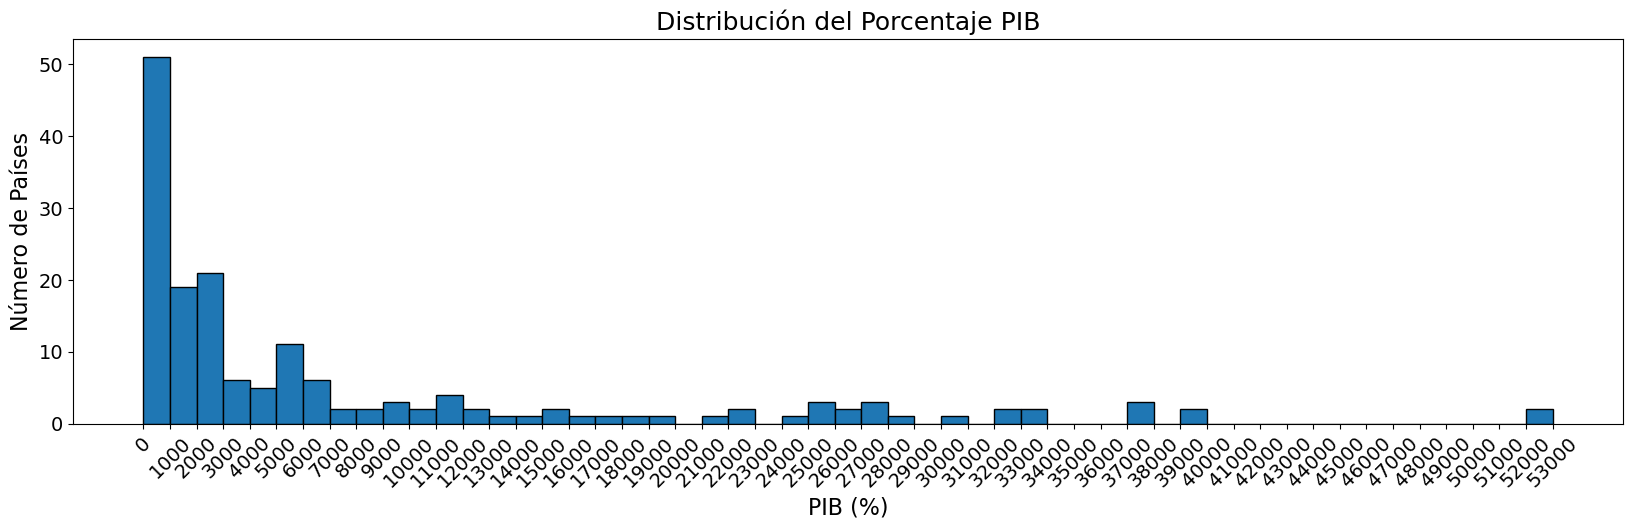

In [33]:
# Trazar un histograma
# Estableciendo el tamaño del gráfico
plt.figure(figsize=(20, 5))

# Creando el histograma con divisiones (bins) ajustadas a 0.2 en el eje x
plt.hist(data_cleaned["incomeperperson"], bins=np.arange(0, data_cleaned["incomeperperson"].max() + 1000, 1000), edgecolor='black')

# Estableciendo el título y las etiquetas de los ejes con un tamaño de fuente mayor
plt.title("Distribución del Porcentaje PIB", fontsize=18)
plt.xlabel("PIB (%)", fontsize=16)
plt.ylabel("Número de Países", fontsize=16)

# Estableciendo las marcas del eje x en intervalos de 0.2 y aumentando el tamaño del texto
plt.xticks(np.arange(0, data_cleaned["incomeperperson"].max() + 1000, 1000), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Mostrando el gráfico
plt.show()

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple

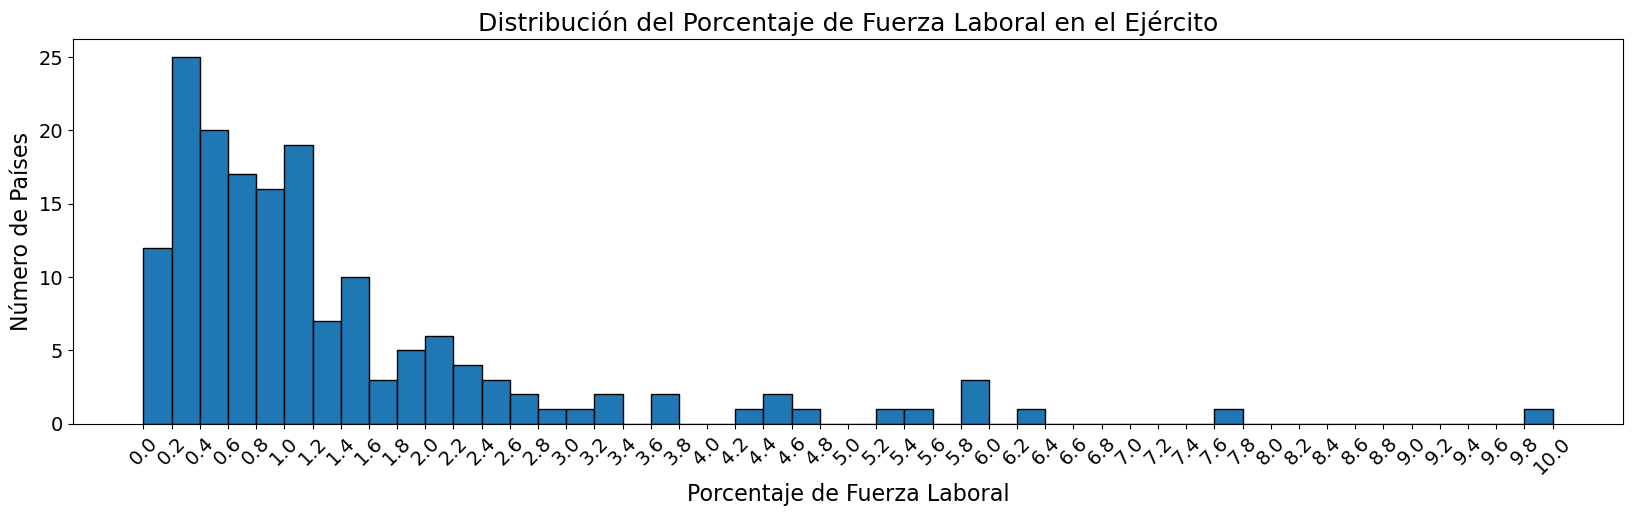

In [34]:
# Trazar un histograma
# Estableciendo el tamaño del gráfico
plt.figure(figsize=(20, 5))

# Creando el histograma con divisiones (bins) ajustadas a 0.2 en el eje x
plt.hist(data_cleaned["armedforcesrate"], bins=np.arange(0, data_cleaned["armedforcesrate"].max() + 0.2, 0.2), edgecolor='black')

# Estableciendo el título y las etiquetas de los ejes con un tamaño de fuente mayor
plt.title("Distribución del Porcentaje de Fuerza Laboral en el Ejército", fontsize=18)
plt.xlabel("Porcentaje de Fuerza Laboral", fontsize=16)
plt.ylabel("Número de Países", fontsize=16)

# Estableciendo las marcas del eje x en intervalos de 0.2 y aumentando el tamaño del texto
plt.xticks(np.arange(0, data_cleaned["armedforcesrate"].max() + 0.2, 0.2), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Mostrando el gráfico
plt.show()

## Histograma distribucion de los datos de los cuartiles  y el IQR

In [36]:
"""
q1(primer cuartil) -> extraemos el valor que corresponde al percentil 25% de los datos.
q2(tercer cuartil) -> extraemos el valor que corresponde al percentil 75% de los datos.
IQR -> es una medida de dispersión que mide la amplitud de los datos dentro del rango intercuartílico

La medidad IQR es util para identificar los valores atipicos (outliers)
cualquier valor de "price_float" por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR es un valor atípico

"""
#q1 = data_cleaned["armedforcesrate"].quantile(0.25)
#q3 = data_cleaned["armedforcesrate"].quantile(0.75)
#iqr = q3 - q1

'\nq1(primer cuartil) -> extraemos el valor que corresponde al percentil 25% de los datos.\nq2(tercer cuartil) -> extraemos el valor que corresponde al percentil 75% de los datos.\nIQR -> es una medida de dispersión que mide la amplitud de los datos dentro del rango intercuartílico\n\nLa medidad IQR es util para identificar los valores atipicos (outliers)\ncualquier valor de "price_float" por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR es un valor atípico\n\n'

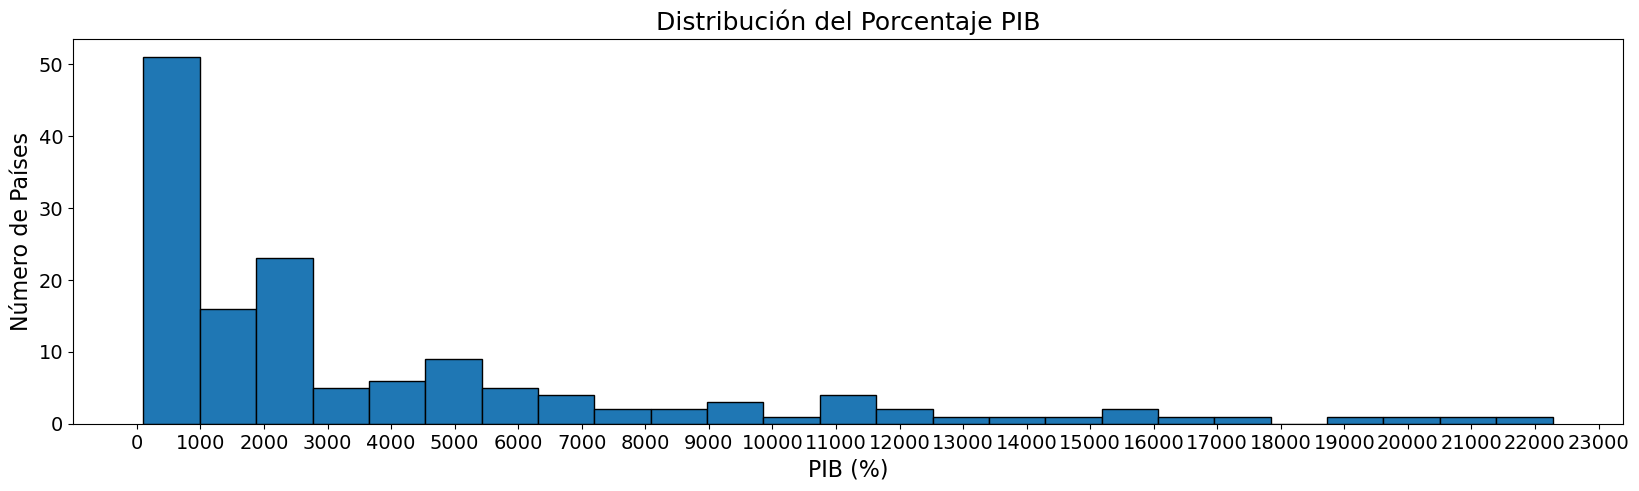

In [37]:


plt.figure(figsize=(20, 5))

# Calcula los valores Q1, Q3 e IQR
q1 = data_cleaned["incomeperperson"].quantile(0.25)
q3 = data_cleaned["incomeperperson"].quantile(0.75)
iqr = q3 - q1

# Define los límites para outliers utilizando la regla 1.5*IQR
upper_limit = q3 + 1.5 * iqr

# Filtra los datos
filtered_data = data_cleaned["incomeperperson"][data_cleaned["incomeperperson"] <= upper_limit]

# Define los ticks del eje x 
x_ticks = np.arange(0, upper_limit+1000, 1000)

# Crea el histograma con los límites personalizados en el eje x
plt.hist(filtered_data, bins=25, edgecolor='black')
plt.title("Distribución del Porcentaje PIB", fontsize=18)
plt.xlabel("PIB (%)", fontsize=16)
plt.ylabel("Número de Países", fontsize=16)
plt.xticks(x_ticks, fontsize=14)  # Establece los ticks del eje x
plt.yticks(fontsize=14)

plt.show()

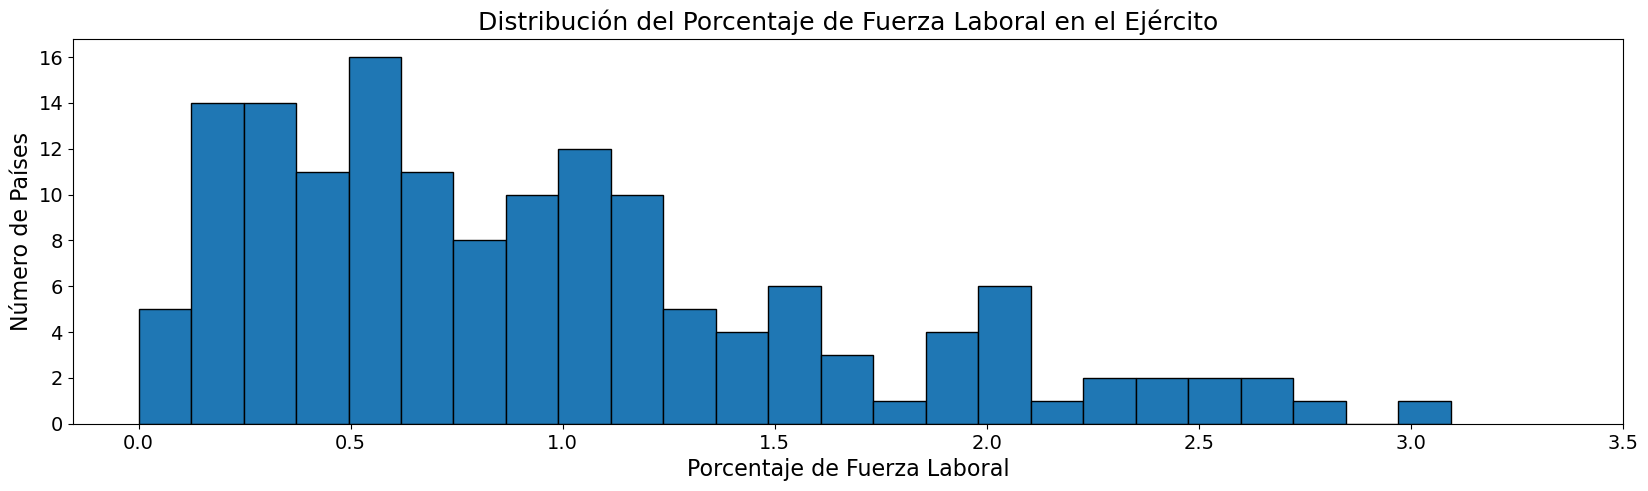

In [28]:


plt.figure(figsize=(20, 5))

# Calcula los valores Q1, Q3 e IQR
q1 = data_cleaned["armedforcesrate"].quantile(0.25)
q3 = data_cleaned["armedforcesrate"].quantile(0.75)
iqr = q3 - q1

# Define los límites para outliers utilizando la regla 1.5*IQR
upper_limit = q3 + 1.5 * iqr

# Filtra los datos
filtered_data = data_cleaned["armedforcesrate"][data_cleaned["armedforcesrate"] <= upper_limit]

# Define los ticks del eje x 
x_ticks = np.arange(0, upper_limit+0.5, 0.5)

# Crea el histograma con los límites personalizados en el eje x
plt.hist(filtered_data, bins=25, edgecolor='black')
plt.title("Distribución del Porcentaje de Fuerza Laboral en el Ejército", fontsize=18)
plt.xlabel("Porcentaje de Fuerza Laboral", fontsize=16)
plt.ylabel("Número de Países", fontsize=16)
plt.xticks(x_ticks, fontsize=14)  # Establece los ticks del eje x
plt.yticks(fontsize=14)

plt.show()

## Diagrama de caja y bigotes

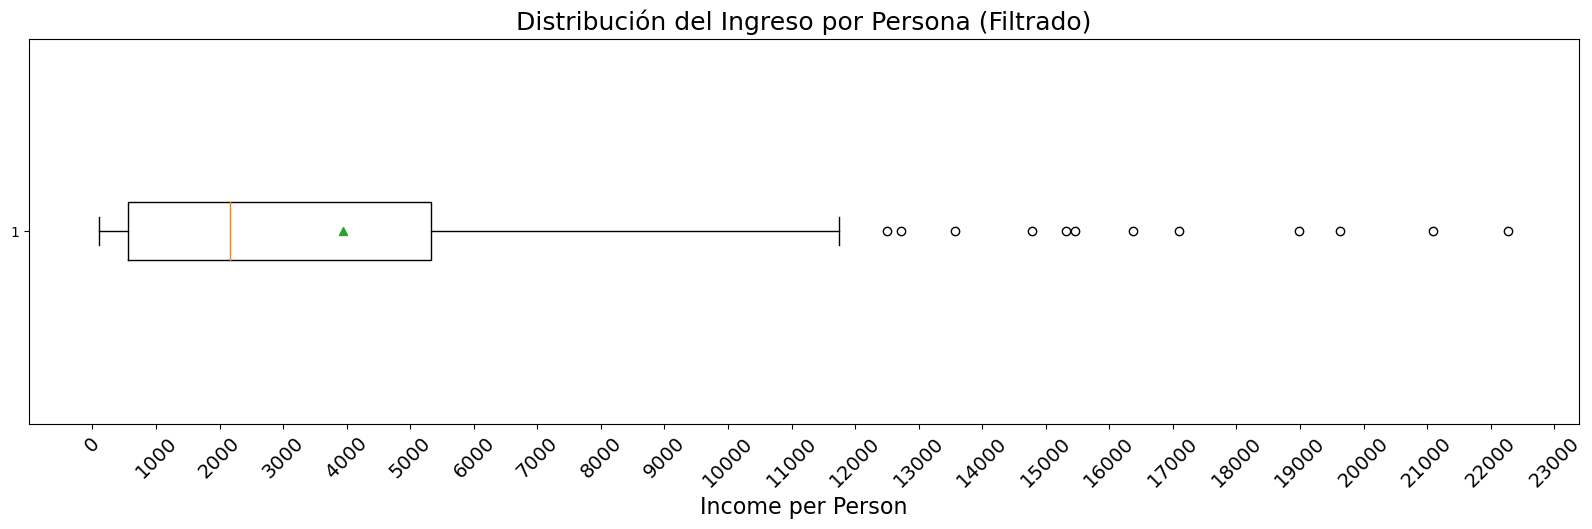

In [51]:
# Calcula el IQR
q1 = data_cleaned["incomeperperson"].quantile(0.25)
q3 = data_cleaned["incomeperperson"].quantile(0.75)
iqr = q3 - q1

# Define el límite superior
upper_limit = q3 + 1.5 * iqr

# Filtra los datos que están por debajo del límite superior
filtered_data = data_cleaned[data_cleaned["incomeperperson"] <= upper_limit]
plt.figure(figsize=(20, 5))

# Diagrama de caja para los datos filtrados
plt.boxplot(filtered_data["incomeperperson"], showmeans=True, vert=False)
plt.title("Distribución del Ingreso por Persona (Filtrado)", fontsize=18)
plt.xlabel("Income per Person", fontsize=16)

# Establece los límites personalizados y el tamaño de fuente en el eje x
x_ticks = np.arange(0, upper_limit + 1000, 1000)
plt.xticks(x_ticks, rotation=45, fontsize=14)

plt.show()

In [42]:
print(data_cleaned["incomeperperson"].describe())

count      167.000000
mean      7874.354473
std      11237.320843
min        103.775857
25%        691.093623
50%       2557.433638
75%       9334.456461
max      52301.587180
Name: incomeperperson, dtype: float64


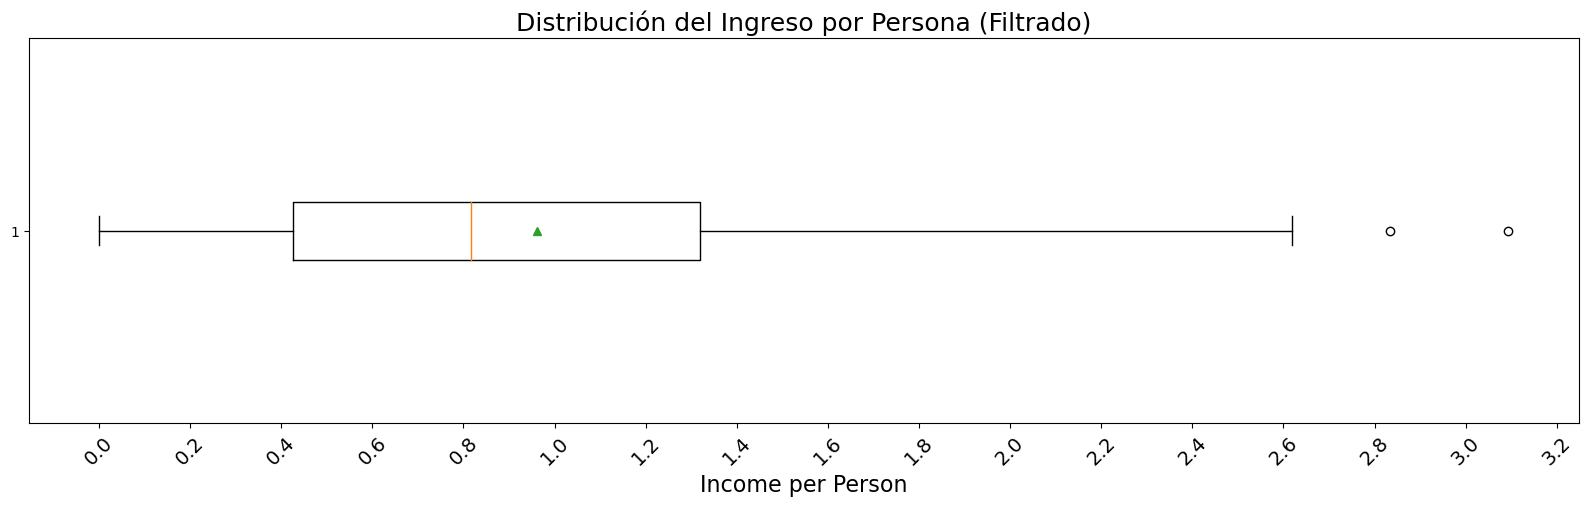

In [50]:
# Calcula el IQR
q1 = data_cleaned["armedforcesrate"].quantile(0.25)
q3 = data_cleaned["armedforcesrate"].quantile(0.75)
iqr = q3 - q1

# Define el límite superior
upper_limit = q3 + 1.5 * iqr

# Filtra los datos que están por debajo del límite superior
filtered_data = data_cleaned[data_cleaned["armedforcesrate"] <= upper_limit]
plt.figure(figsize=(20, 5))

# Diagrama de caja para los datos filtrados
plt.boxplot(filtered_data["armedforcesrate"], showmeans=True, vert=False)
plt.title("Distribución del Ingreso por Persona (Filtrado)", fontsize=18)
plt.xlabel("Income per Person", fontsize=16)

# Establece los límites personalizados y el tamaño de fuente en el eje x
x_ticks = np.arange(0, upper_limit + 0.2, 0.2)
plt.xticks(x_ticks, rotation=45, fontsize=14)

plt.show()



# Analisis Bivariado
---

                 internetuserate  lifeexpectancy  polityscore  employrate  \
internetuserate         1.000000        0.771420     0.375893   -0.198929   
lifeexpectancy          0.771420        1.000000     0.277569   -0.323491   
polityscore             0.375893        0.277569     1.000000   -0.146577   
employrate             -0.198929       -0.323491    -0.146577    1.000000   
armedforcesrate         0.038326        0.198706    -0.329602   -0.309782   

                 armedforcesrate  
internetuserate         0.038326  
lifeexpectancy          0.198706  
polityscore            -0.329602  
employrate             -0.309782  
armedforcesrate         1.000000  


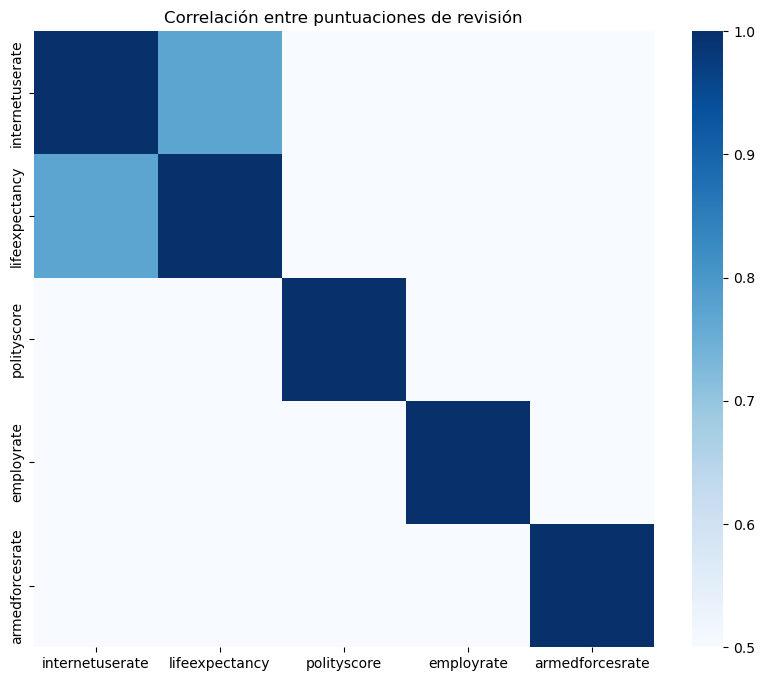

In [49]:
# Paso 1: Calculo de la matriz de correlación
correlation_matrix = data_cleaned[["internetuserate", "lifeexpectancy", "polityscore", "employrate", "armedforcesrate"]].corr()

# Paso 2: Verificacion de la matriz de correlación
print(correlation_matrix)

# Paso 3: Generar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=0.5, vmax=1, cmap="Blues")
plt.title("Correlación entre puntuaciones de revisión")
plt.show()

In [54]:
q1 = data_cleaned["incomeperperson"].quantile(0.25)
q3 = data_cleaned["incomeperperson"].quantile(0.75)
iqr = q3 - q1

data_sample_df =  data_cleaned.loc[data_cleaned["incomeperperson"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
data_sample_df.shape

(14, 16)

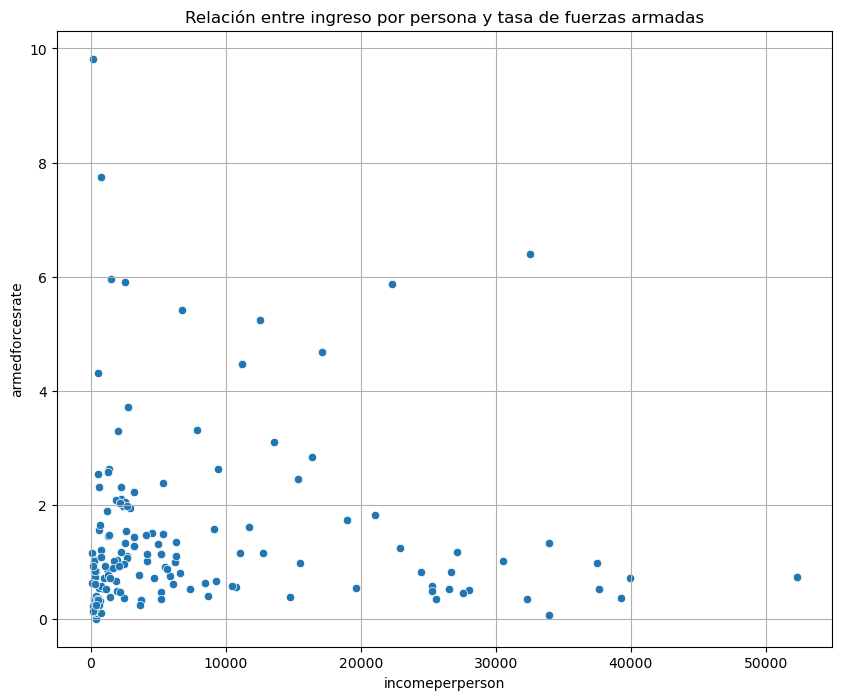

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_cleaned["incomeperperson"],
    y=data_cleaned["armedforcesrate"]
)
plt.title("Relación entre ingreso por persona y tasa de fuerzas armadas")
plt.grid()
plt.show()

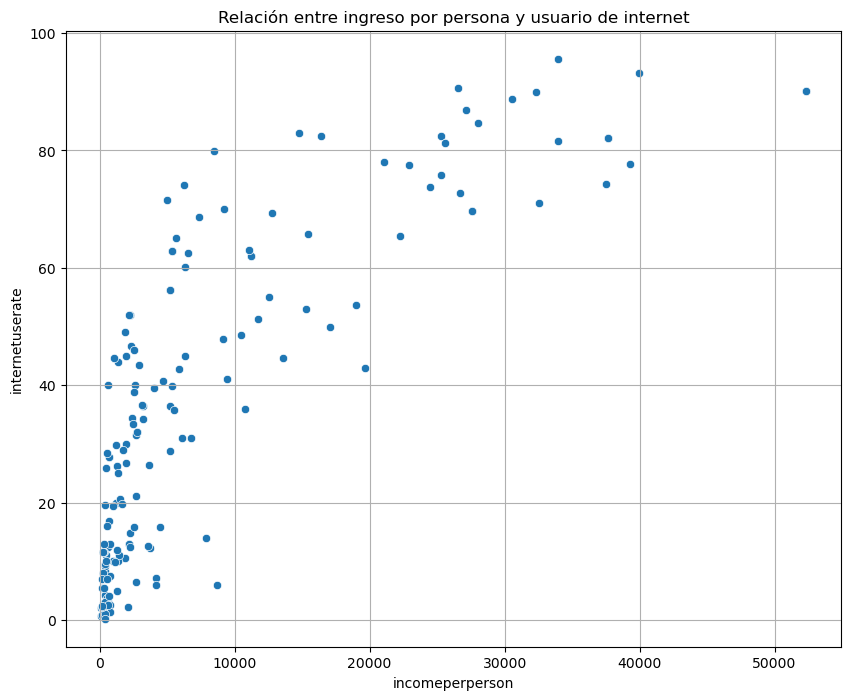

In [60]:
# Imprimiendo relación entre ingreso por persona y usuario de internet
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_cleaned["incomeperperson"],
    y=data_cleaned["internetuserate"]
)
plt.title("Relación entre ingreso por persona y usuario de internet")
plt.grid()
plt.show()

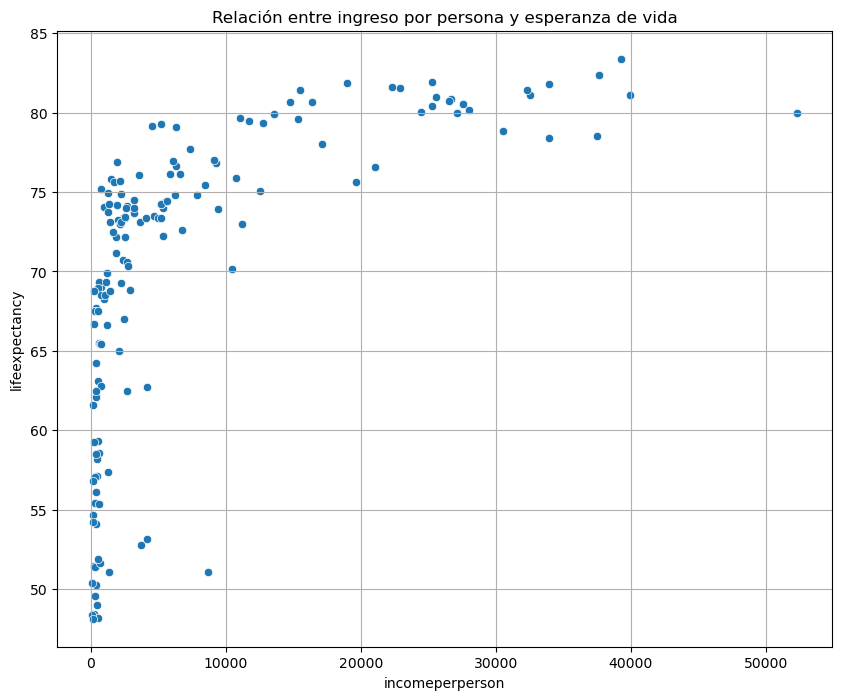

In [61]:
# Impresion de la relación entre ingreso por persona y esperanza de vida
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_cleaned["incomeperperson"],
    y=data_cleaned["lifeexpectancy"]
)
plt.title("Relación entre ingreso por persona y esperanza de vida")
plt.grid()
plt.show()

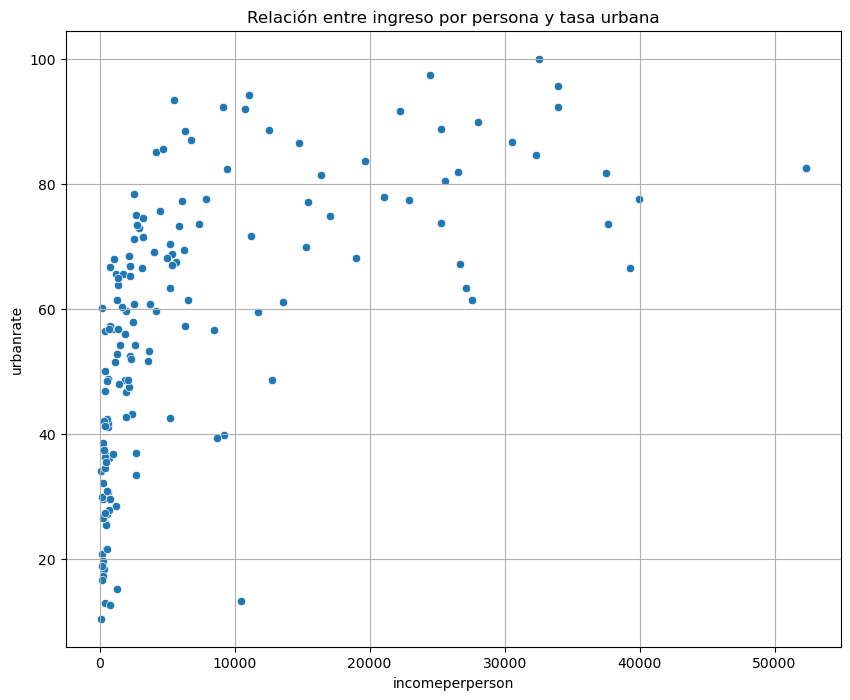

In [62]:
# Impresion de la Relación entre ingreso por persona y tasa urbana
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_cleaned["incomeperperson"],
    y=data_cleaned["urbanrate"]
)
plt.title("Relación entre ingreso por persona y tasa urbana")
plt.grid()
plt.show()

In [63]:
country_frec_cumsum = data_cleaned["country"].value_counts(normalize=True).cumsum()

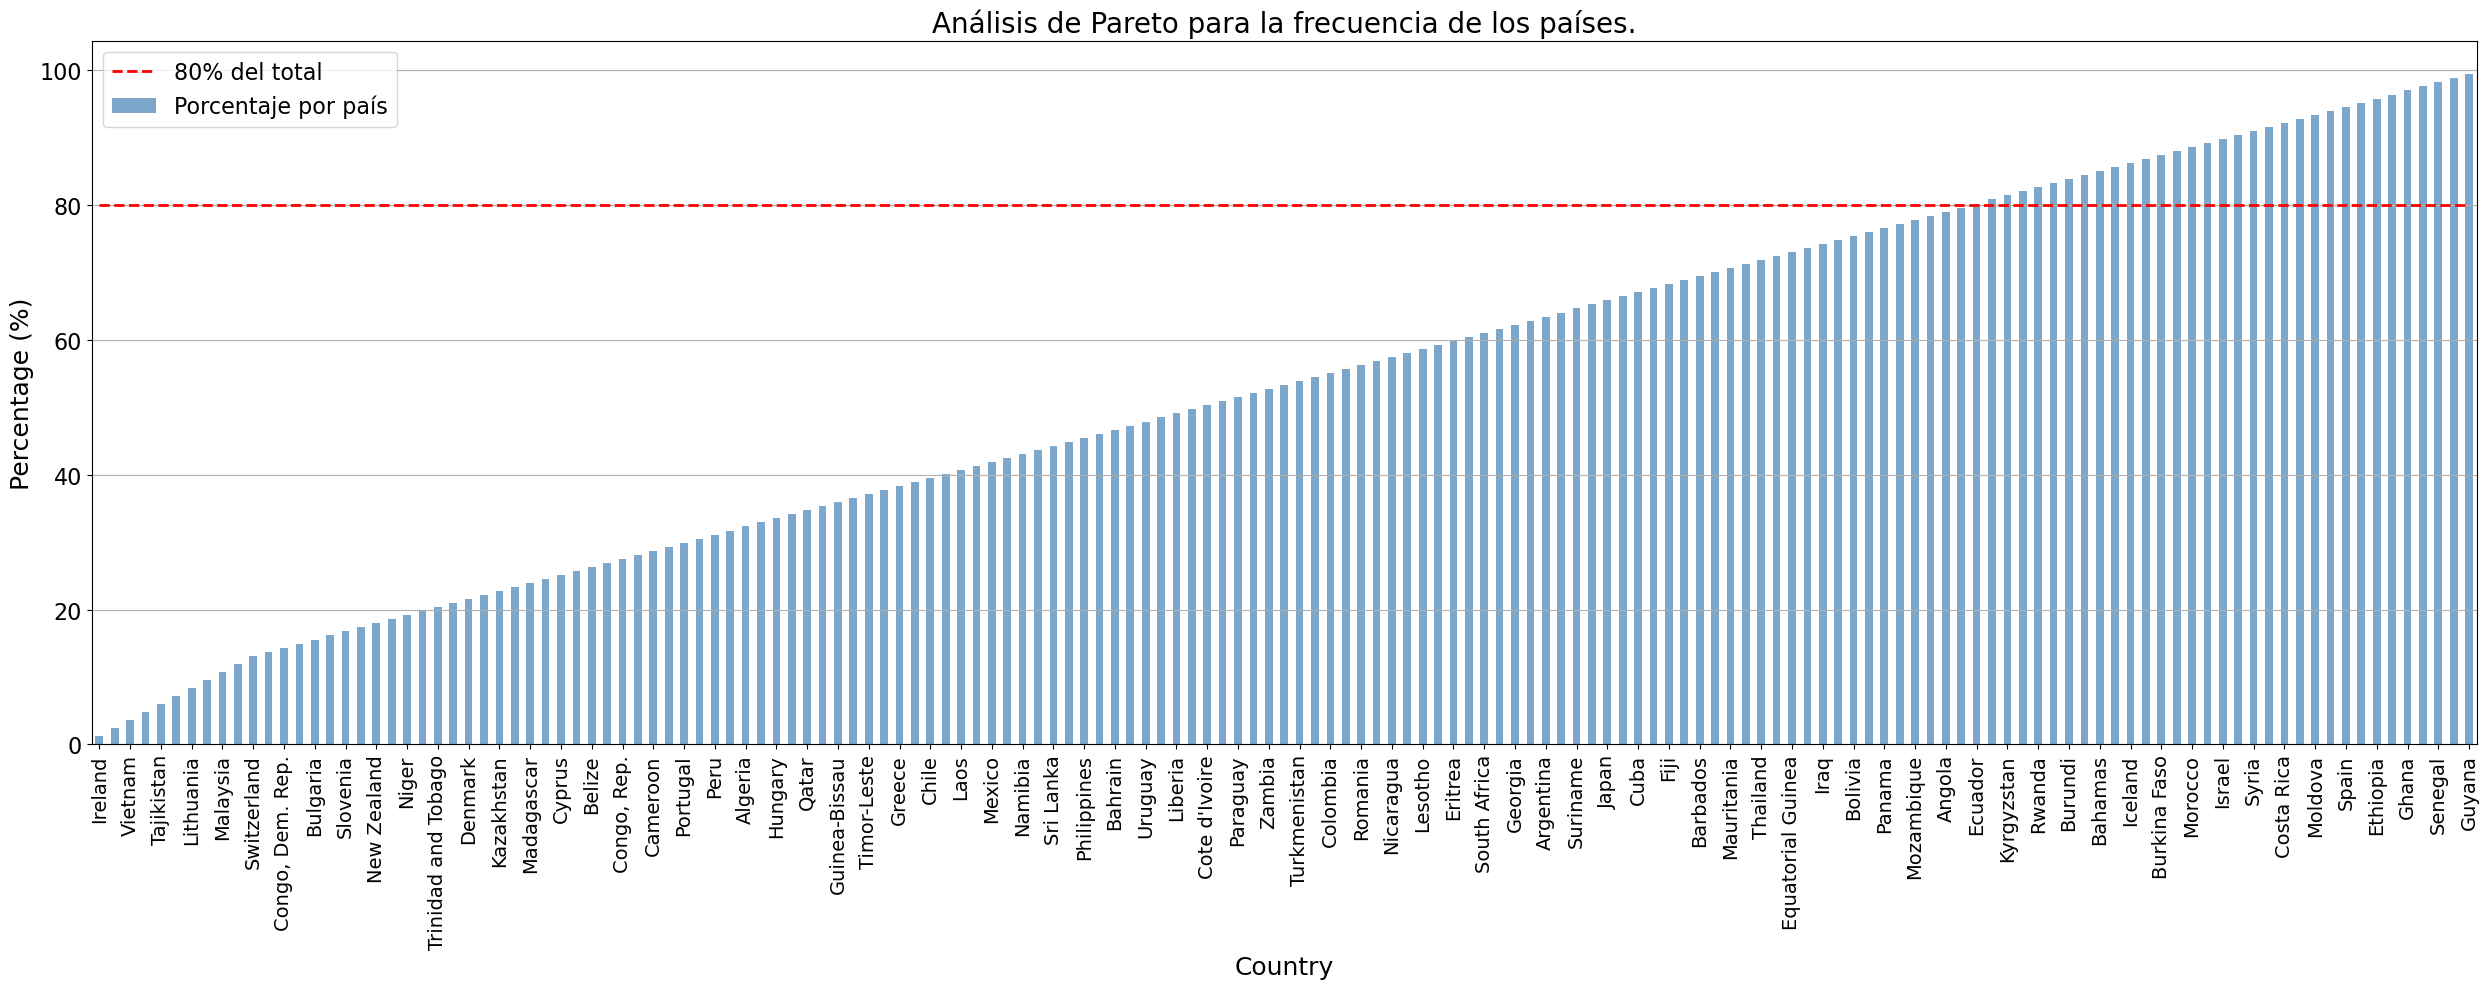

In [65]:
# Calcula el porcentaje acumulado
country_frec_cumsum_percent = country_frec_cumsum * 100

# Incrementar el tamaño del gráfico
plt.figure(figsize=(25, 10))

# Limitando el número de barras mostradas
limit_percent = 100
limited_countries = country_frec_cumsum_percent[country_frec_cumsum_percent <= limit_percent]
n_countries = len(limited_countries)

# Imprimiendo
limited_countries.plot(kind="bar", color="steelblue", alpha=0.7, label="Porcentaje por país", fontsize=16)
plt.plot(range(n_countries), [80] * n_countries, 'r--', label="80% del total", linewidth=2)
plt.title("Análisis de Pareto para la frecuencia de los países.", fontsize=20)
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Country", fontsize=18)

# Mostrar solo cada segunda etiqueta y ajustar el tamaño de fuente de las etiquetas del eje x
plt.xticks(range(0, n_countries, 2), limited_countries.index[::2], rotation=90, fontsize=14)

plt.grid(axis="y")
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

In [69]:
most_representative_country = country_frec_cumsum_percent.loc[country_frec_cumsum_percent < 80].index.tolist()
most_representative_country

['Ireland',
 'Luxembourg',
 'Vietnam',
 'Iran',
 'Tajikistan',
 'Belarus',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Oman',
 'Switzerland',
 'Togo',
 'Congo, Dem. Rep.',
 'Nepal',
 'Bulgaria',
 'Singapore',
 'Slovenia',
 'Belgium',
 'New Zealand',
 'Botswana',
 'Niger',
 'Honduras',
 'Trinidad and Tobago',
 'Guinea',
 'Denmark',
 'Dominican Rep.',
 'Kazakhstan',
 'Benin',
 'Madagascar',
 'France',
 'Cyprus',
 'Chad',
 'Belize',
 'Jamaica',
 'Congo, Rep.',
 'Ukraine',
 'Cameroon',
 'Australia',
 'Portugal',
 'Egypt',
 'Peru',
 'India',
 'Algeria',
 'Bosnia and Herzegovina',
 'Hungary',
 'Czech Rep.',
 'Qatar',
 'Tunisia',
 'Guinea-Bissau',
 'Nigeria',
 'Timor-Leste',
 'Netherlands',
 'Greece',
 'El Salvador',
 'Chile',
 'Canada',
 'Laos',
 'Latvia',
 'Mexico',
 'Mauritius',
 'Namibia',
 'United Arab Emirates',
 'Sri Lanka',
 'Brunei',
 'Philippines',
 'Brazil',
 'Bahrain',
 'Sweden',
 'Uruguay',
 'Malawi',
 'Liberia',
 'United Kingdom',
 "Cote d'Ivoire",
 'Jordan',
 'Paraguay',
 '

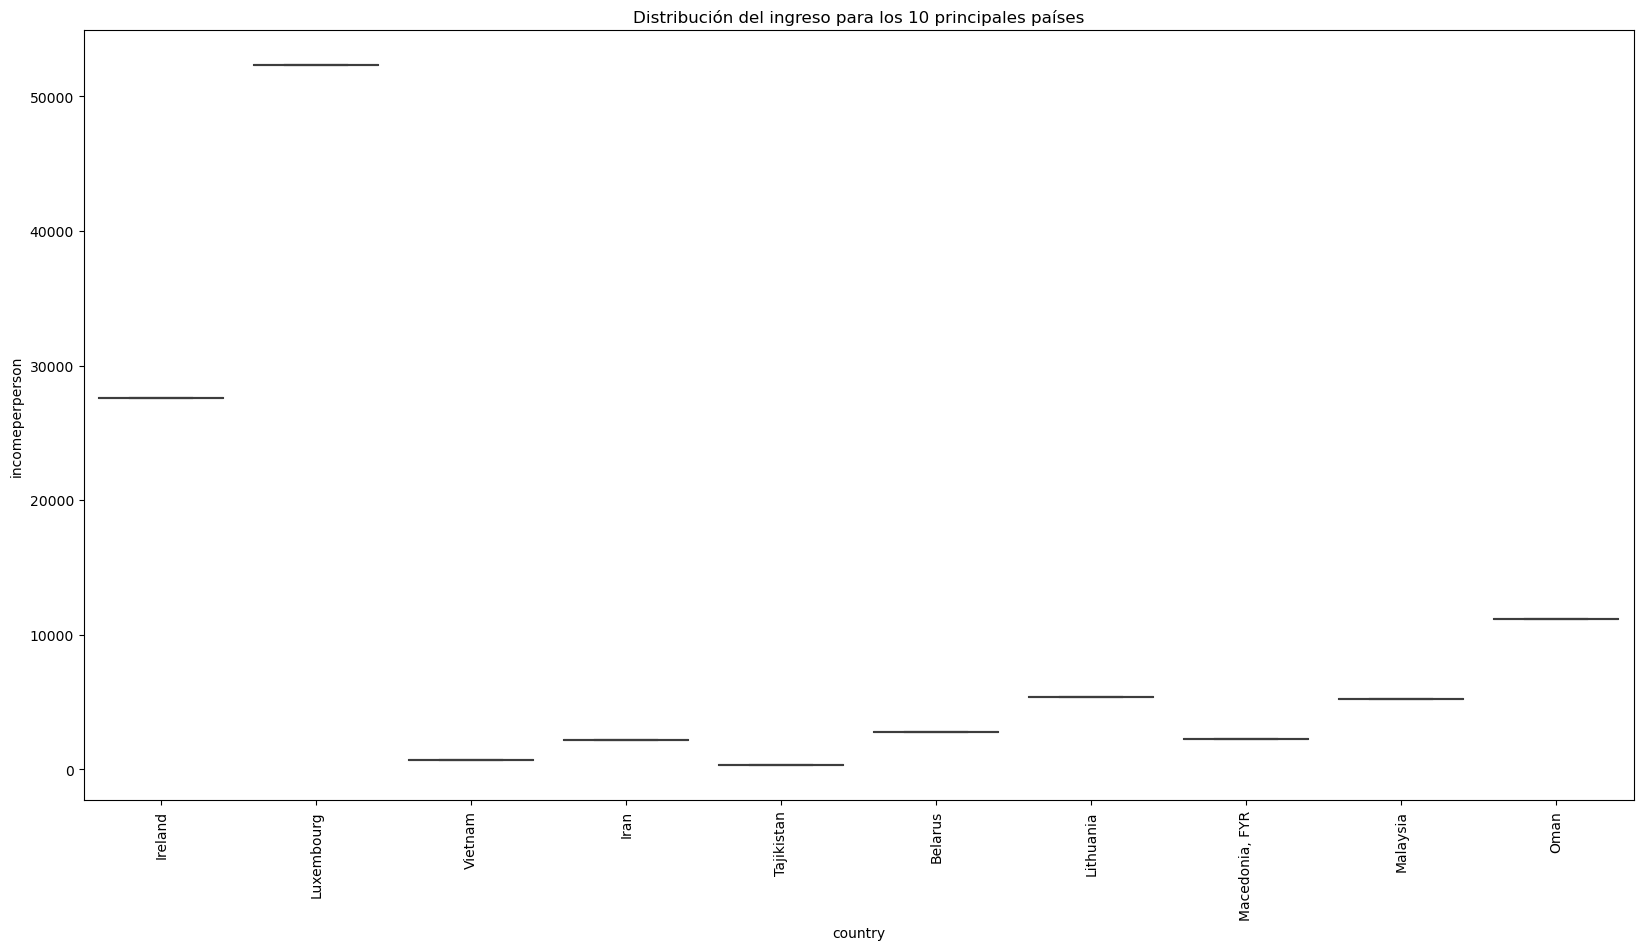

In [74]:
# Selecciona solo los primeros 10 países más representativos
top_10_countries = most_representative_country[:10]

# Filtra el DataFrame para incluir solo esos países
filtered_data_top_10 = data_cleaned[data_cleaned["country"].isin(top_10_countries)]

# Gráfica
plt.figure(figsize=(20, 10))
sns.boxplot(x='country', y='incomeperperson', data=filtered_data_top_10, order=top_10_countries)
plt.title("Distribución del ingreso para los 10 principales países")
plt.xticks(rotation=90)  # Esto es para que las etiquetas del eje x (nombres de los países) estén rotadas y no se solapen.
plt.show()


## Regresion lineal con statsmodel

In [76]:
lm = smf.ols(formula="incomeperperson~urbanrate", data = data_cleaned).fit()

In [79]:
lm.params

Intercept   -8741.430754
urbanrate     290.685381
dtype: float64

El modelo lineal predictivo sería 
incomeperperson = -8505.947120 + 284.944642 * urbanrate

In [80]:
lm.pvalues 

Intercept    1.939724e-05
urbanrate    6.533655e-16
dtype: float64

In [81]:
lm.rsquared

0.3274852545698691

In [82]:
lm.rsquared_adj

0.3234094076278683

In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        incomeperperson   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     80.35
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.53e-16
Time:                        19:57:30   Log-Likelihood:                -1760.9
No. Observations:                 167   AIC:                             3526.
Df Residuals:                     165   BIC:                             3532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8741.4308   1986.887     -4.400      0.000   -1.27e+04   -4818.430
urbanrate    290.6854     32.429      8.964      0.000     226.656     354.715
==============================================================================
Omnibus:                       58.658   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.977
Skew:                           1.577   Prob(JB):                     5.97e-29
Kurtosis:                       5.955   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
sales_pred = lm.predict(pd.DataFrame(data_cleaned["urbanrate"]))
# 1. Eliminar o imputar valores faltantes (NaN)
# Por simplicidad, eliminar las filas con NaNs, pero se puede imputar con la media, mediana, etc.
data_cleaned = data_cleaned.dropna(subset=["urbanrate", "incomeperperson"])

# 2. Eliminar o reemplazar valores infinitos
data_cleaned = data_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=["urbanrate", "incomeperperson"])

# 3. Verificar valores muy grandes 
# Suponiendo que no esperas valores superiores a un cierto límite, se puede filtrar o ajustar estos valores

data_cleaned = data_cleaned[data_cleaned["incomeperperson"] <= 1e5]


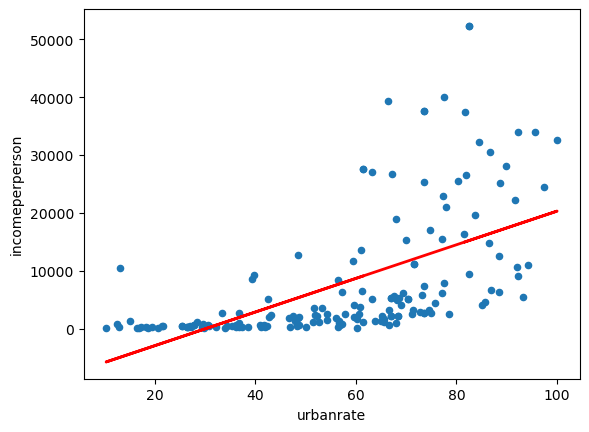

In [87]:
# Grafica de dispersion
data_cleaned.plot(kind="scatter", x="urbanrate", y="incomeperperson")

# Añadir la línea de predicción
plt.plot(data_cleaned["urbanrate"].values, sales_pred, c="red", linewidth=2)
plt.show() 

In [88]:
data_cleaned["incomeperperson_pred"] = -8505.947120 + 284.944642*data["urbanrate"]

In [96]:
#RSE (Residual Sum of Squares)
#El término RSE se refiere a la Suma de los Cuadrados de los Residuales. 
#Los residuales son la diferencia entre los valores observados y los valores predichos por el modelo de regresión. 
data_cleaned["RSE"] = (data_cleaned["incomeperperson"]-data_cleaned["incomeperperson_pred"])**2

In [99]:
#SSD (Sum of Squared Deviations)
#SSD generalmente se refiere a la Suma de las Desviaciones al Cuadrado, 
#aunque a veces también se le llama Suma de los Cuadrados de las Diferencias.
#es una medida de la dispersión total dentro de un conjunto de datos. 
SSD = sum(data_cleaned["RSE"])
SSD

14101395663.673079

In [107]:
# Error estandar residual
RSE = np.sqrt(SSD/(len(data_cleaned)-2))
RSE

9244.62027463871

In [109]:
# calcula la media (promedio) de la columna
sales_m = np.mean(data_cleaned["incomeperperson"])

In [115]:
# contendrá el valor promedio de la columna "incomeperperson" en el conjunto de datos
sales_m

7874.35447296946

In [117]:
# calidad del modelo de regresión en función de la variabilidad relativa
error = RSE/sales_m

In [121]:
error

1.17401627096837

(array([28., 52., 39., 23.,  7.,  8.,  3.,  4.,  1.,  2.]),
 array([-12556.72375744,  -7569.38158034,  -2582.03940325,   2405.30277385,
          7392.64495094,  12379.98712804,  17367.32930514,  22354.67148223,
         27342.01365933,  32329.35583642,  37316.69801352]),
 <BarContainer object of 10 artists>)

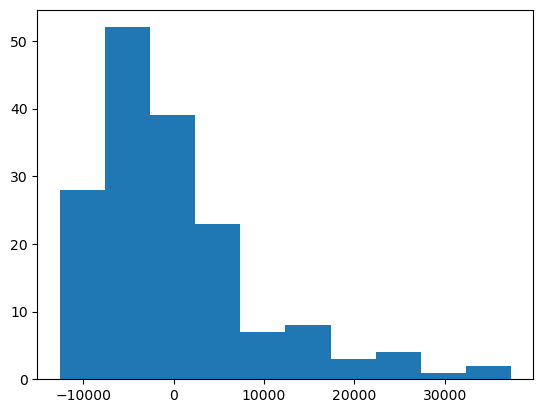

In [122]:
plt.hist((data_cleaned["incomeperperson"]-data_cleaned["incomeperperson_pred"]))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* incomeperperson ~urbanrate
* incomeperperson ~lifeexpectancy
* incomeperperson ~armedforcesrate
* incomeperperson ~Internetuserate
* incomeperperson ~employrate
* incomeperperson ~urbanrate+lifeexpectancy
* incomeperperson ~armedforcesrate+Internetuserate
* incomeperperson ~urbanrate+Internetuserate
* incomeperperson ~urbanrate+Internetuserate+lifeexpectancy

In [126]:
#Añadir el Newspaper al modelo existente
# Este modelo de regresión lineal múltiple permitirá analizar cómo "urbanrate" y "lifeexpectancy" se relacionan conjuntamente con "incomeperperson" y cómo contribuyen en la predicción de esta variable dependiente.
lm2 = smf.ols(formula="incomeperperson~urbanrate+lifeexpectancy", data = data_cleaned).fit()

In [128]:
lm2.params

Intercept        -33412.019202
urbanrate           161.126339
lifeexpectancy      458.077031
dtype: float64

In [132]:
lm2.pvalues

Intercept         2.749761e-09
urbanrate         8.689762e-05
lifeexpectancy    1.754825e-06
dtype: float64

incomeperperson = -34070.962869+155.000809*urbanrate +471.982183*lifeexpectancy

In [141]:
lm2.rsquared

0.415184358795601

In [144]:
lm2.rsquared_adj

0.40805246073213275

In [147]:
incomeperperson_pred = lm2.predict(data_cleaned[["urbanrate", "lifeexpectancy"]])

In [149]:
incomeperperson_pred

0      13372.781884
1       9350.172483
2      -5025.752857
3       8203.602874
4      15053.357399
           ...     
172    11158.818453
173    14277.794084
174     7043.113727
175     1137.656914
177    15725.250090
Length: 167, dtype: float64

In [152]:
#  Suma de Cuadrados de Diferencias (SSD) entre los valores observados de la variable "incomeperperson" en el DataFrame
SSD = sum((data_cleaned["incomeperperson"]-incomeperperson_pred)**2)

In [159]:
SSD

12258931807.960388

In [161]:
RSE = np.sqrt(SSD/(len(data)-2-1))

In [164]:
RSE

8369.649867385779

In [165]:
error = RSE / sales_m

In [169]:
error

1.0628998092626556

In [171]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        incomeperperson   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     58.22
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           7.86e-20
Time:                        20:13:12   Log-Likelihood:                -1749.3
No. Observations:                 167   AIC:                             3505.
Df Residuals:                     164   BIC:                             3514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.341e+04   5310.536     -6.292      0.000   -4.39e+04   -2.29e+04
urbanrate        161.1263     40.033      4.025      0.000      82.081     240.172
lifeexpectancy   458.0770     92.369      4.959      0.000     275.690     640.464
==============================================================================
Omnibus:                       55.261   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.543
Skew:                           1.490   Prob(JB):                     1.10e-26
Kurtosis:                       5.880   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# --------------------------------------
lm3 = smf.ols(formula="incomeperperson~urbanrate+internetuserate+lifeexpectancy", data = data_cleaned).fit()

In [177]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        incomeperperson   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     97.96
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.72e-36
Time:                        20:13:18   Log-Likelihood:                -1708.0
No. Observations:                 167   AIC:                             3424.
Df Residuals:                     163   BIC:                             3436.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         107.3033   5300.359      0.020      0.984   -1.04e+04    1.06e+04
urbanrate          39.9364     33.536      1.191      0.235     -26.284     106.157
internetuserate   320.1576     31.365     10.207      0.000     258.223     382.093
lifeexpectancy    -84.9533     89.818     -0.946      0.346    -262.310      92.403
==============================================================================
Omnibus:                       28.247   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.007
Skew:                           0.774   Prob(JB):                     4.18e-13
Kurtosis:                       5.408   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
lm3.params

Intercept          107.303320
urbanrate           39.936427
internetuserate    320.157593
lifeexpectancy     -84.953308
dtype: float64

In [182]:
lm2.pvalues

Intercept         2.749761e-09
urbanrate         8.689762e-05
lifeexpectancy    1.754825e-06
dtype: float64

incomeperperson = -34070.962869+155.000809*urbanrate +471.982183*lifeexpectancy

In [185]:
lm3.rsquared

0.6432311416931304

In [192]:
lm3.rsquared_adj

0.6366648436874827

In [195]:
incomeperperson_pred = lm3.predict(data_cleaned[["urbanrate", "lifeexpectancy", "internetuserate"]])
SSD = sum((data_cleaned["incomeperperson"]-incomeperperson_pred)**2)
RSE = np.sqrt(SSD/(len(data_cleaned)-3-1))

In [198]:
RSE

6773.552354711808

In [202]:
RSE/sales_m

0.8602041447287635

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [204]:
lm_n = smf.ols(formula="urbanrate~internetuserate+lifeexpectancy", data = data_cleaned).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.9914036284341934

In [207]:
lm_n = smf.ols(formula="internetuserate~urbanrate+lifeexpectancy", data = data_cleaned).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

2.823593023228192

In [210]:
lm_n = smf.ols(formula="lifeexpectancy~urbanrate+internetuserate", data = data_cleaned).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

2.683124222513895

# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [213]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [216]:
feature_cols = ["lifeexpectancy", "urbanrate", "internetuserate", "armedforcesrate", "employrate"]

In [221]:
# entrenamiento y prueba
a = np.random.randn(len(data_cleaned))
check = (a<0.8)
training = data_cleaned[check]
testing = data_cleaned[~check]
X_training = training[feature_cols]
Y_training = training["internetuserate"]

In [223]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X_training,Y_training)

In [226]:
selector.support_

array([False, False,  True,  True, False])

In [233]:
selector.ranking_

array([2, 4, 1, 1, 3])

In [236]:
X_pred = testing[["lifeexpectancy", "internetuserate"]]
Y_pred = testing["internetuserate"]

In [240]:
lm = LinearRegression()
lm.fit(X_pred, Y_pred)

LinearRegression()

In [245]:
lm.intercept_

-7.105427357601002e-15

In [248]:
lm.coef_

array([1.32715067e-16, 1.00000000e+00])

In [252]:
lm.score(X_pred, Y_pred)

1.0

In [256]:
# Hacer predicciones en el conjunto de prueba
y_pred = lm.predict(X_pred)

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_pred, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 2.3920270015568827e-29


In [263]:
# Calcular el Error Cuadrático Medio Relativo
rmse_relative = np.sqrt(mse) / (Y_pred.max() - Y_pred.min())

# Calcular el Error Porcentual Promedio Absoluto (MAPE)
mape = 100 * np.mean(np.abs((Y_pred - y_pred) / Y_pred))

print(f"RMSE Relativo: {rmse_relative}")
print(f"MAPE: {mape:.2f}%")

RMSE Relativo: 5.4370670264669045e-17
MAPE: 0.00%


In [268]:
X_pred = testing[["lifeexpectancy", "urbanrate"]]
Y_pred = testing["internetuserate"]

In [271]:
lm = LinearRegression()
lm.fit(X_pred, Y_pred)

LinearRegression()

In [276]:
lm.score(X_pred, Y_pred)

0.7073339616989608

In [280]:
# Hacer predicciones en el conjunto de prueba
y_pred = lm.predict(X_pred)

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_pred, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 281.1993893487854


In [285]:
# Calcular el Error Cuadrático Medio Relativo
rmse_relative = np.sqrt(mse) / (Y_pred.max() - Y_pred.min())

# Calcular el Error Porcentual Promedio Absoluto (MAPE)
mape = 100 * np.mean(np.abs((Y_pred - y_pred) / Y_pred))

print(f"RMSE Relativo: {rmse_relative}")
print(f"MAPE: {mape:.2f}%")

RMSE Relativo: 0.1864184250957001
MAPE: 172.28%


In [289]:
X_pred = testing[["armedforcesrate", "employrate"]]
Y_pred = testing["internetuserate"]

In [292]:
lm = LinearRegression()
lm.fit(X_pred, Y_pred)

LinearRegression()

In [302]:
lm.score(X_pred, Y_pred)

0.17674205275368782